In [35]:
from email.contentmanager import raw_data_manager
from pydoc import classname
import numpy as np
import pandas as pd

filename = 'heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(filename)
raw_data = df.values

cols = range(0, 13)

X = raw_data[:, cols]

attribute_names = np.asarray(df.columns[cols])
attribute_dic = dict(zip(attribute_names, range(len(attribute_names))))

# Our class labels is DEATH 
classLabels = raw_data[:, -1]
classNames = sorted(set(classLabels))
classDic = dict(zip([0,1], range(2)))
y = X[:,-1]

N = len(y)
M = len(attribute_names)
C = len(classNames)

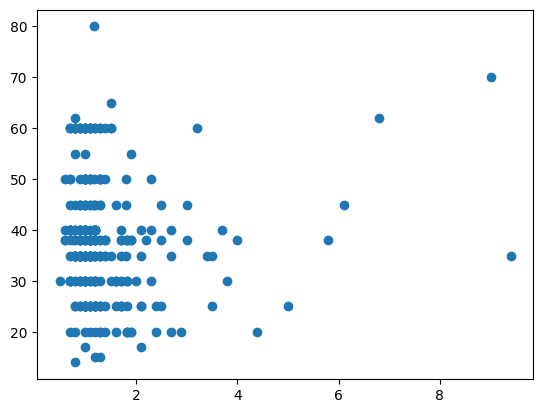

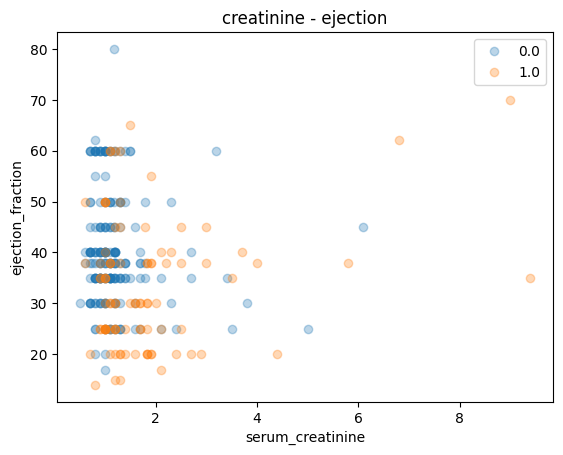

In [37]:
import matplotlib.pyplot as plt

i = attribute_dic["serum_creatinine"]
j = attribute_dic["ejection_fraction"]




f = plt.figure()
plt.title('creatinine - ejection')


for c in range(C):
    class_mask = y==c
    plt.plot(X[class_mask,i], X[class_mask,j], 'o',alpha=.3)

plt.legend(classNames)
plt.xlabel(attribute_names[i])
plt.ylabel(attribute_names[j])

# Output result to screen
plt.show()

#testing



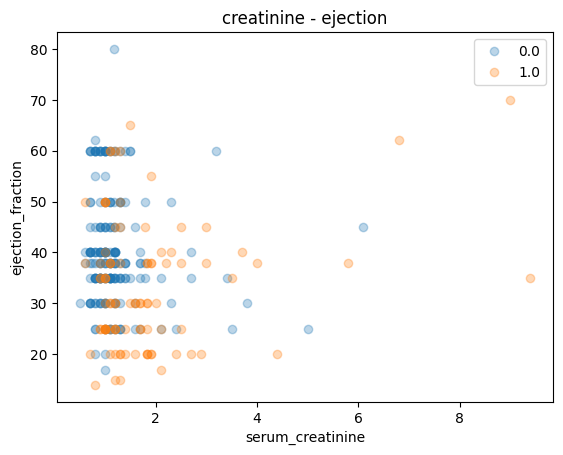

In [42]:
import matplotlib.pyplot as plt

i = attribute_dic["serum_creatinine"]
j = attribute_dic["ejection_fraction"]




f = plt.figure()
plt.title('creatinine - ejection')


for c in range(C):
    class_mask = y==c
    plt.plot(X[class_mask,i], X[class_mask,j],'o', alpha=.3)

plt.legend(classNames)
plt.xlabel(attribute_names[i])
plt.ylabel(attribute_names[j])

# Output result to screen
plt.show()


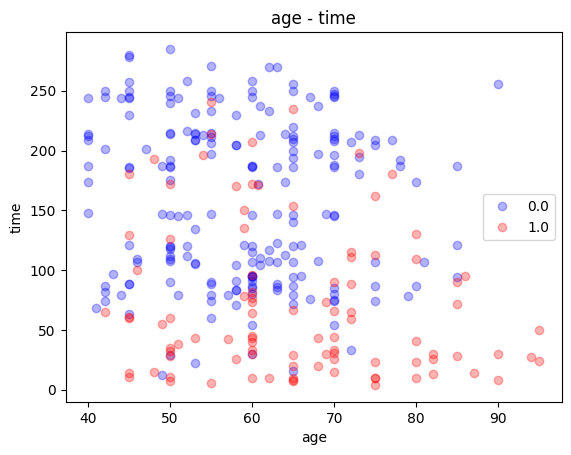

In [50]:
import matplotlib.pyplot as plt

i = attribute_dic["age"]
j = attribute_dic["time"]




f = plt.figure()
plt.title('age - time')


for c in range(C):
    class_mask = y==c
    a = ['bo','ro']
    plt.plot(X[class_mask,i], X[class_mask,j],a[c],alpha=.3)

plt.legend(classNames)
plt.xlabel(attribute_names[i])
plt.ylabel(attribute_names[j])

# Output result to screen
plt.show()


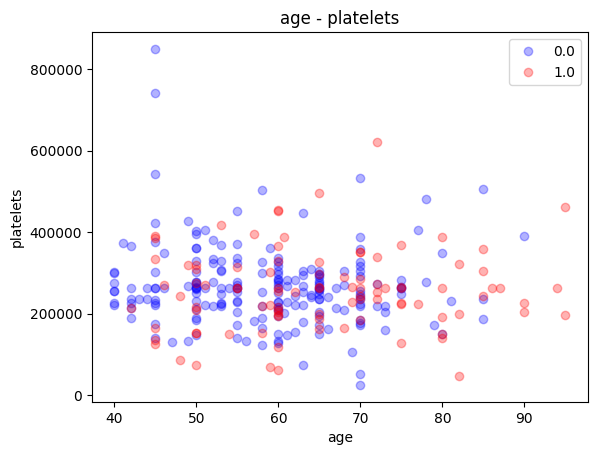

In [51]:
import matplotlib.pyplot as plt

i = attribute_dic["age"]
j = attribute_dic["platelets"]




f = plt.figure()
plt.title('age - platelets')


for c in range(C):
    class_mask = y==c
    a = ['bo','ro']
    plt.plot(X[class_mask,i], X[class_mask,j],a[c],alpha=.3)

plt.legend(classNames)
plt.xlabel(attribute_names[i])
plt.ylabel(attribute_names[j])

# Output result to screen
plt.show()


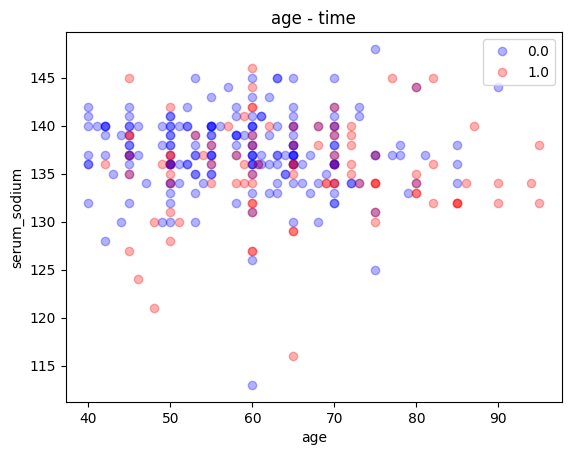

In [52]:
import matplotlib.pyplot as plt

i = attribute_dic["age"]
j = attribute_dic["serum_sodium"]




f = plt.figure()
plt.title('age - time')


for c in range(C):
    class_mask = y==c
    a = ['bo','ro']
    plt.plot(X[class_mask,i], X[class_mask,j],a[c],alpha=.3)

plt.legend(classNames)
plt.xlabel(attribute_names[i])
plt.ylabel(attribute_names[j])

# Output result to screen
plt.show()
